<a href="https://colab.research.google.com/github/cydal/tsExtract/blob/master/energycast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import concat

from scipy.stats import kurtosis, skew, moment,entropy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 15)})

In [2]:
cols = ["Date", "energy", "speed-guitrancourt", "speed-lieusaint", "speed-lvs-pussay", "speed-parc-du-gatinais", "speed-arville", "speed-boissy-la-riviere",
"speed-angerville-1", "speed-angerville-2", "direction-guitrancourt", "direction-lieusaint", "direction-lvs-pussay", "direction-parc-du-gatinais", 
"direction-arville", "direction-boissy-la-riviere", "direction-angerville-1", "direction-angerville-2", "speed-guitrancourt-b", "speed-lieusaint-b", "speed-lvs-pussay-b", "speed-parc-du-gatinais-b", "speed-arville-b", "speed-boissy-la-riviere-b",
"speed-angerville-1-b", "speed-angerville-2-b", "direction-guitrancourt-b", "direction-lieusaint-b", "direction-lvs-pussay-b", "direction-parc-du-gatinais-b", 
"direction-arville-b", "direction-boissy-la-riviere-b", "direction-angerville-1-b", "direction-angerville-2-b"]

In [3]:
df = pd.read_csv("data.csv", header=None, names=cols)

df["Date"] = pd.to_datetime(df["Date"], format='%d/%b/%Y %H:%M')


df_s = df.copy()
df_s = df_s.set_index("Date")

FileNotFoundError: [Errno 2] File data.csv does not exist: 'data.csv'

In [ ]:
cols = ["Date", "energy"]

df = pd.read_csv("data_t.csv", header=None, names=cols)

df["Date"] = pd.to_datetime(df["Date"], format='%d/%b/%Y %H:%M')


df_s = df.copy()
df_s = df_s.set_index("Date")

In [ ]:
len(cols)

2

In [ ]:
df.shape

(31346, 2)

In [ ]:
df.head()

Date  energy
0 2017-01-01 00:00:00     0.0
1 2017-01-01 01:00:00     0.0
2 2017-01-01 02:00:00     0.0
3 2017-01-01 03:00:00     0.0
4 2017-01-01 04:00:00     0.0

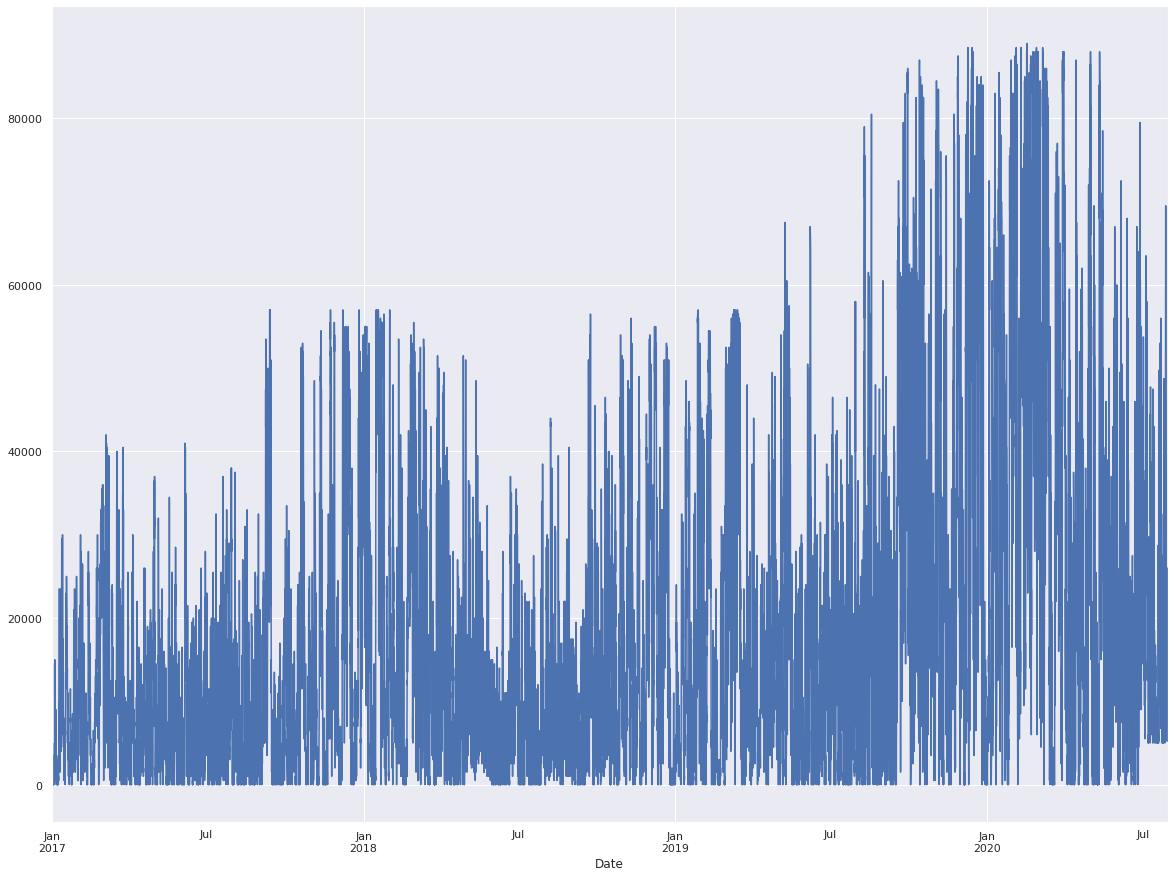

In [ ]:
df_s["energy"].plot()

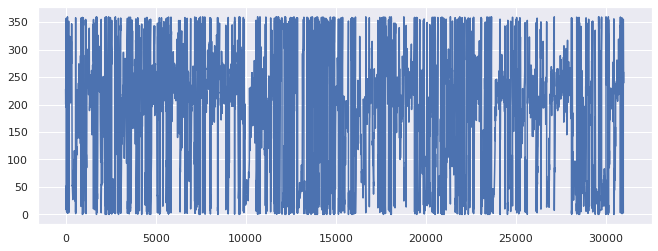

In [ ]:
df["direction-angerville-2-b"].plot()

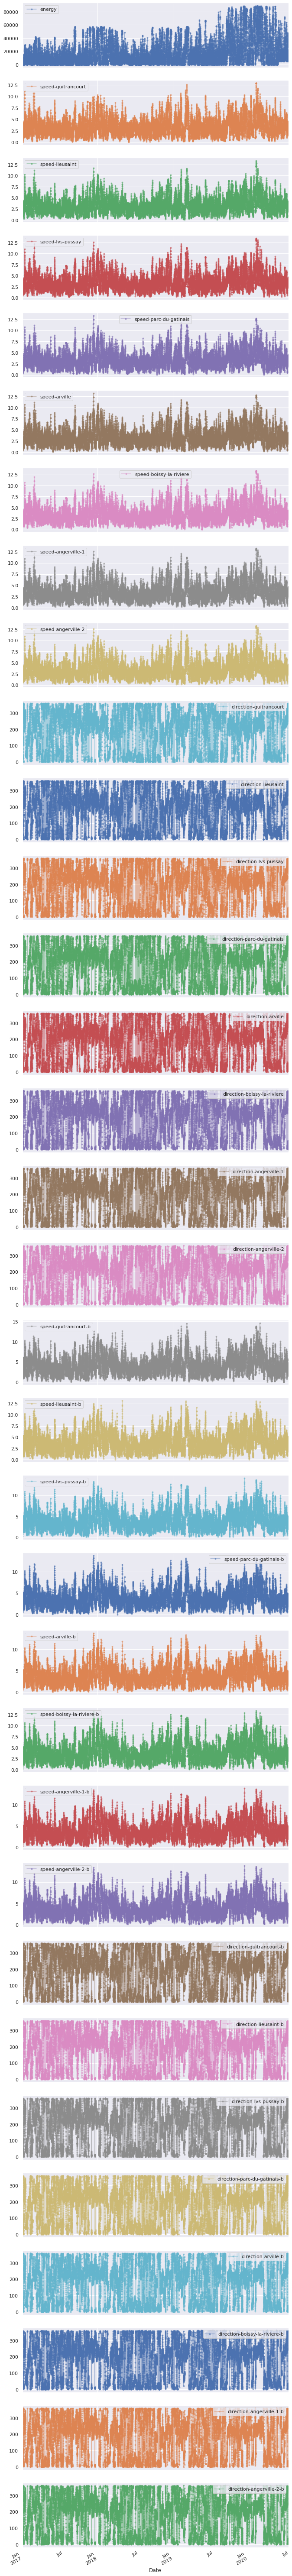

In [ ]:
axes = df_s[cols[1:]].plot(marker='.', alpha=0.5, linestyle='-', figsize=(11, 120), subplots=True)

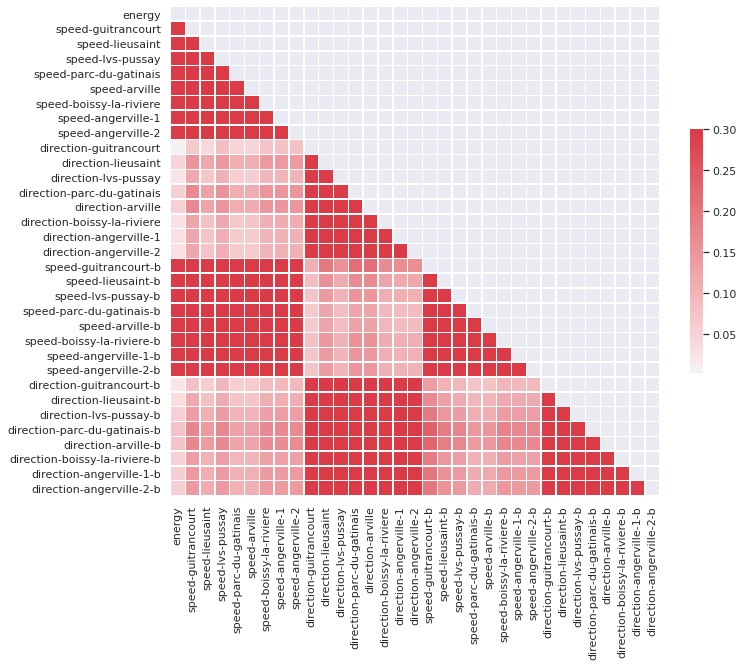

In [ ]:
corr = df[cols[1:]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled = pd.DataFrame(data=scaler.fit_transform(df[cols[1:]]), columns=cols[1:])
scaled["Date"] = df["Date"]

In [ ]:
scaled.head()

energy  speed-guitrancourt  ...  direction-angerville-2-b                Date
0 -0.918105           -0.911250  ...                  0.452264 2017-01-01 00:00:00
1 -0.918105           -0.854876  ...                  0.409294 2017-01-01 01:00:00
2 -0.918105           -0.798502  ...                  0.366324 2017-01-01 02:00:00
3 -0.918105           -0.736491  ...                  0.323354 2017-01-01 03:00:00
4 -0.918105           -0.680117  ...                  0.280384 2017-01-01 04:00:00

[5 rows x 34 columns]

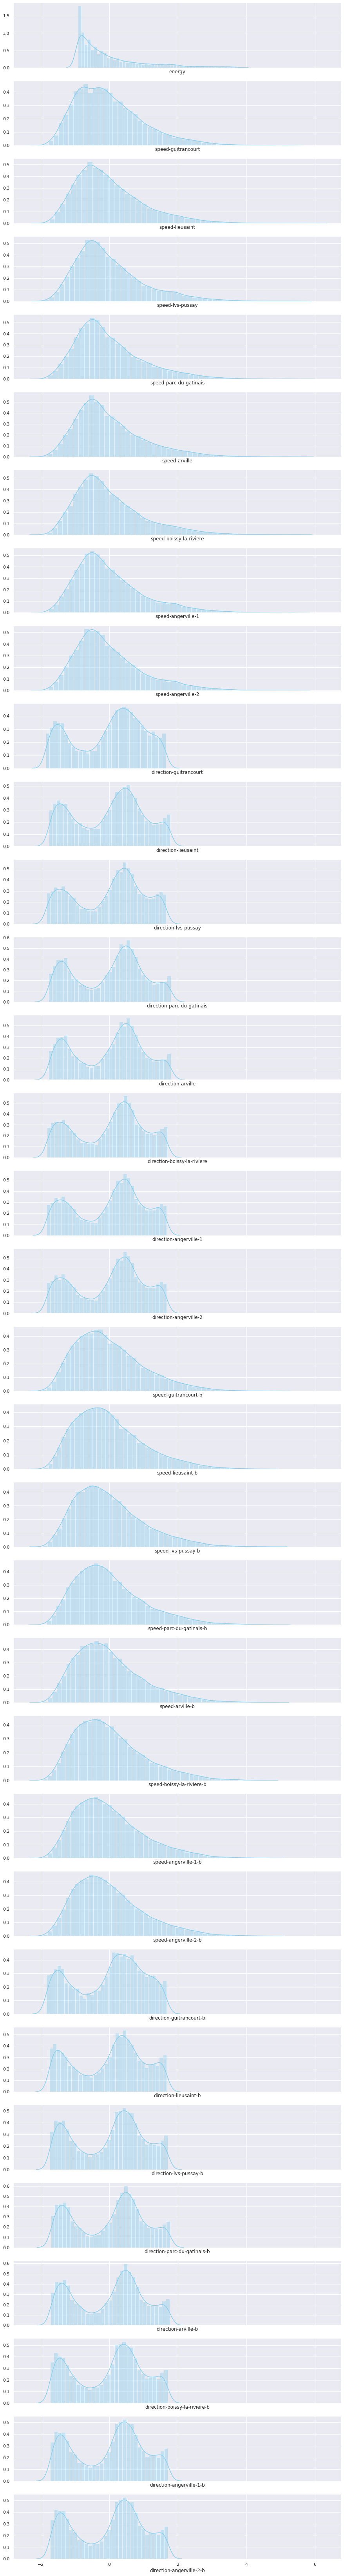

In [ ]:
# plot
f, axes = plt.subplots(len(cols)-1, 1, figsize=(15, 120), sharex=True)

for i in range(1, len(cols)):
  sns.distplot( scaled[cols[i]] , color="skyblue", ax=axes[i-1])


In [ ]:
years

2017     2018    2019
0         0.0  48500.0  1500.0
1         0.0  44500.0  2000.0
2         0.0  43000.0  3500.0
3         0.0  40000.0  5500.0
4         0.0  43500.0  4000.0
...       ...      ...     ...
8755  49500.0      0.0  1000.0
8756  45500.0   1000.0  1000.0
8757  42500.0    500.0   500.0
8758  47000.0   1000.0     0.0
8759  47000.0   1000.0     0.0

[8760 rows x 3 columns]

In [ ]:
from pandas import Grouper


groups = df_s.groupby(Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
	years[name.year] = group["energy"].values

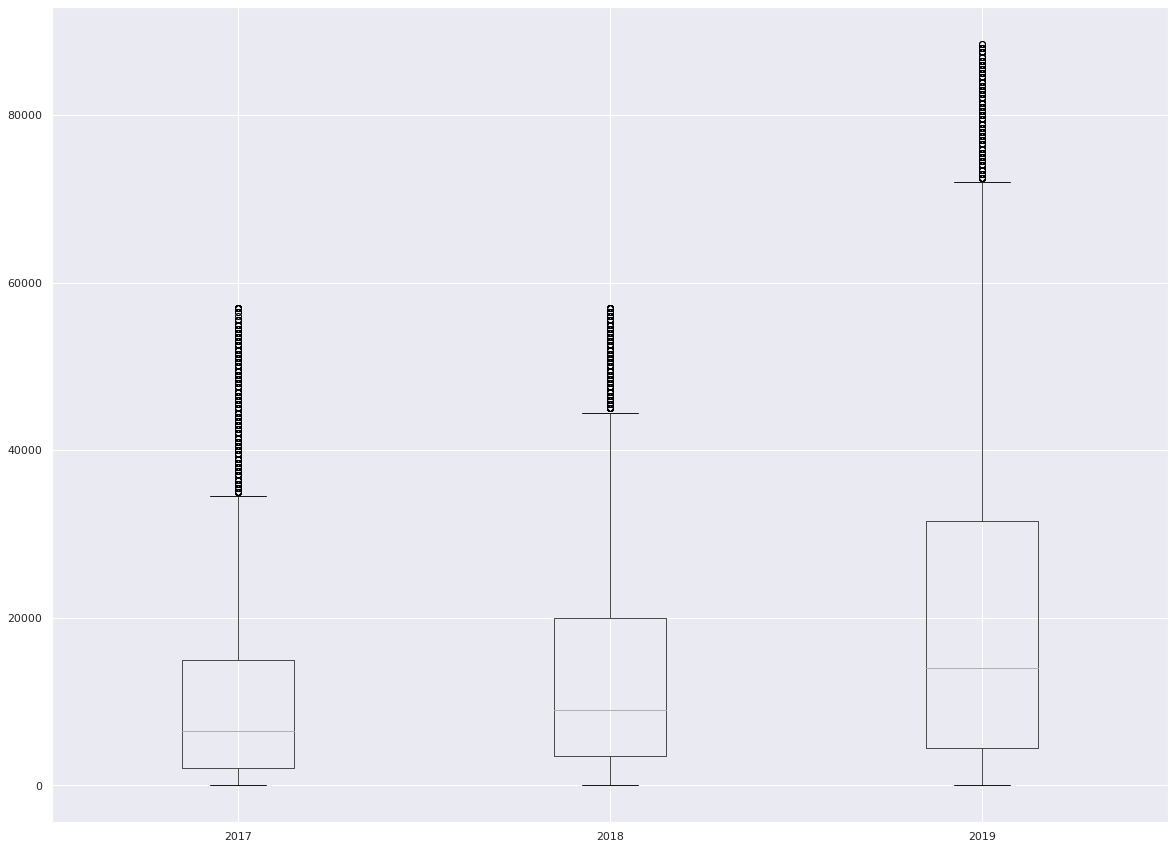

In [ ]:
years.boxplot()

In [ ]:
for name, group in groups:
  print(name)

2019-01-31 00:00:00
2019-02-28 00:00:00
2019-03-31 00:00:00
2019-04-30 00:00:00
2019-05-31 00:00:00
2019-06-30 00:00:00
2019-07-31 00:00:00
2019-08-31 00:00:00
2019-09-30 00:00:00
2019-10-31 00:00:00
2019-11-30 00:00:00
2019-12-31 00:00:00


In [ ]:
months

0     1     2     3     4   ...      28      29      30      31      32
0     1500.0  1.76  1.36  0.88  1.33  ...  104.00  102.00   89.00   89.00   89.00
1     2000.0  1.82  1.39  1.01  1.35  ...   92.67   91.33   81.00   80.50   80.50
2     3500.0  1.88  1.41  1.14  1.37  ...   81.33   80.67   73.00   72.00   72.00
3     5500.0  1.94  1.44  1.27  1.40  ...   70.00   70.00   65.00   63.50   63.50
4     4000.0  2.00  1.46  1.40  1.42  ...   58.67   59.33   57.00   55.00   55.00
..       ...   ...   ...   ...   ...  ...     ...     ...     ...     ...     ...
739  33000.0  6.52  5.70  5.83  5.78  ...  170.00  169.00  167.83  171.33  171.33
740  31000.0  5.97  5.25  5.50  5.49  ...  168.00  167.00  166.67  170.67  170.67
741  44000.0  5.41  4.80  5.17  5.21  ...  166.00  165.00  165.50  170.00  170.00
742  40500.0  4.85  4.35  4.83  4.93  ...  164.00  163.00  164.33  169.33  169.33
743  23000.0  4.30  3.90  4.50  4.64  ...  162.00  161.00  163.17  168.67  168.67

[744 rows x 396 columns]

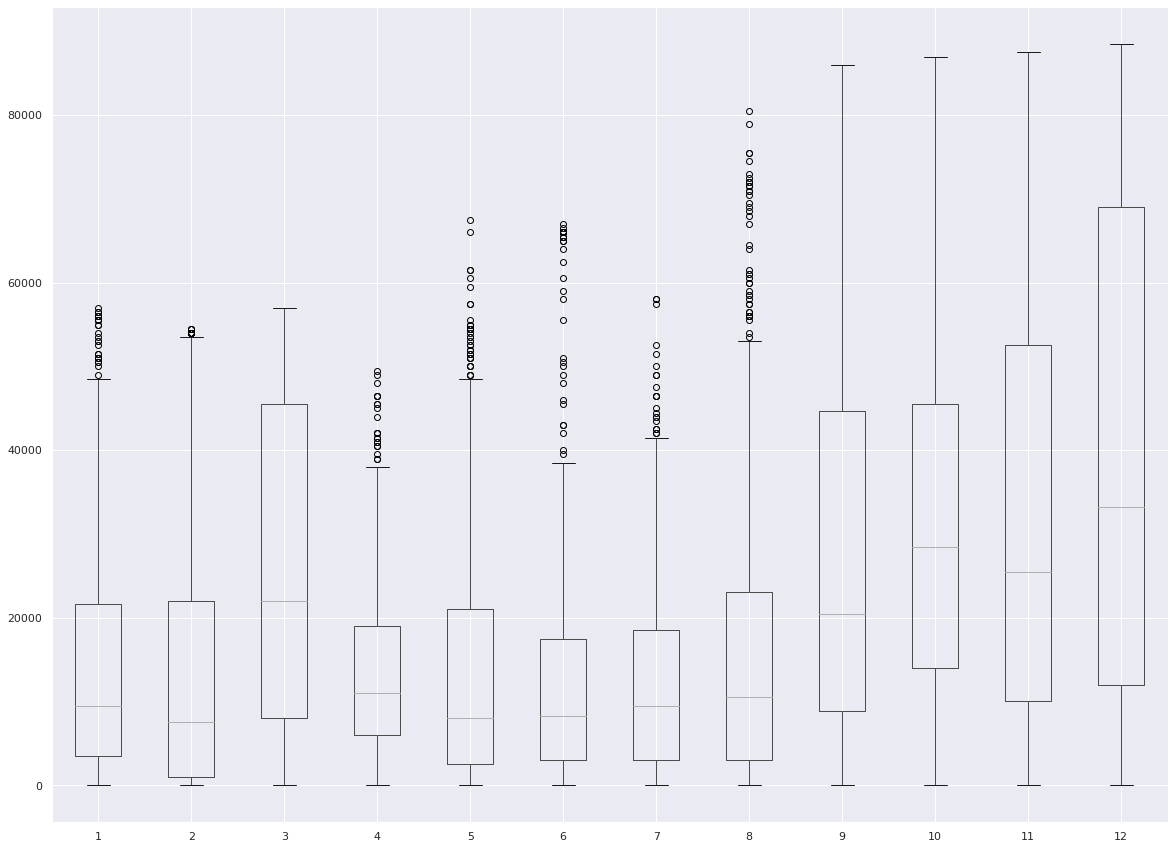

In [ ]:
one_year = df_s['2019']
groups = one_year.groupby(Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months[0])
months.columns = range(1,13)
months.boxplot()

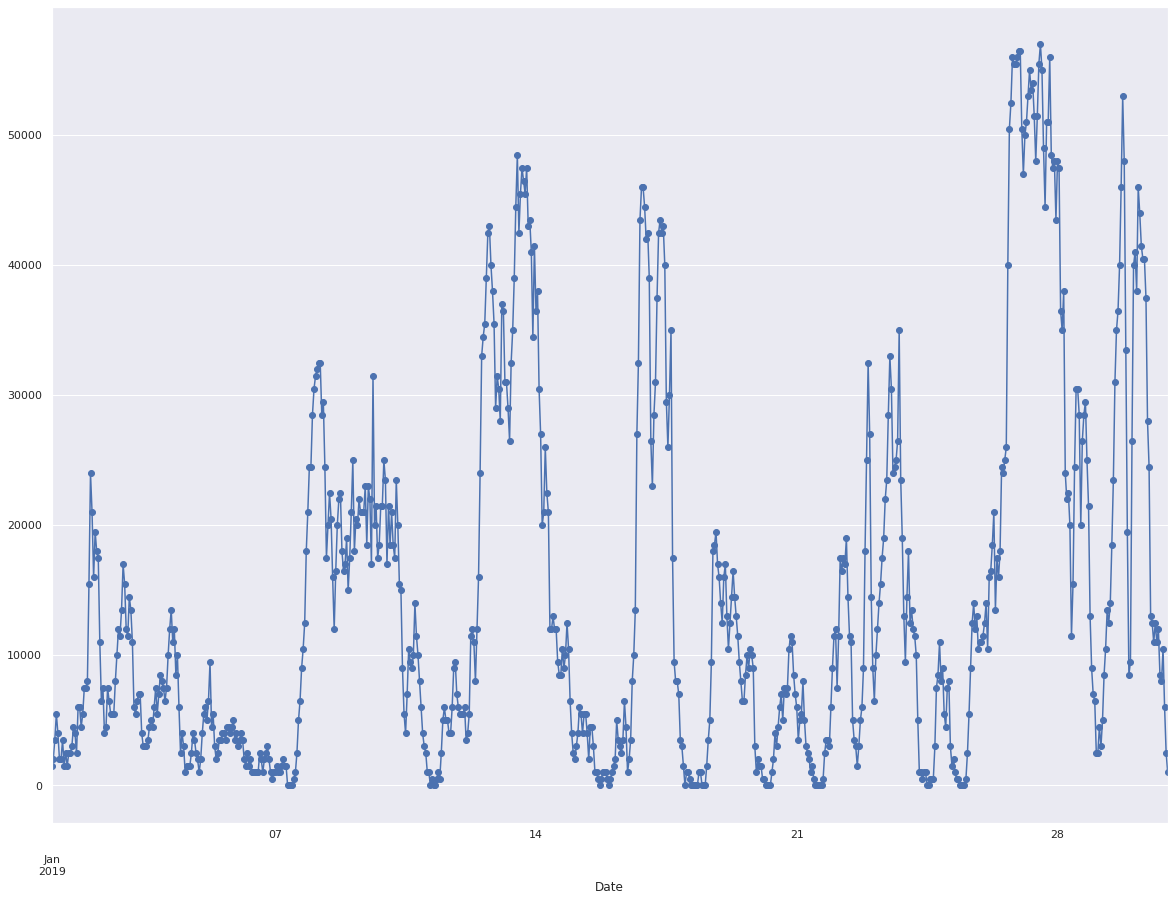

In [ ]:
df_s.loc['2019-01-01':'2019-01-30', 'energy'].plot(marker='o', linestyle='-')

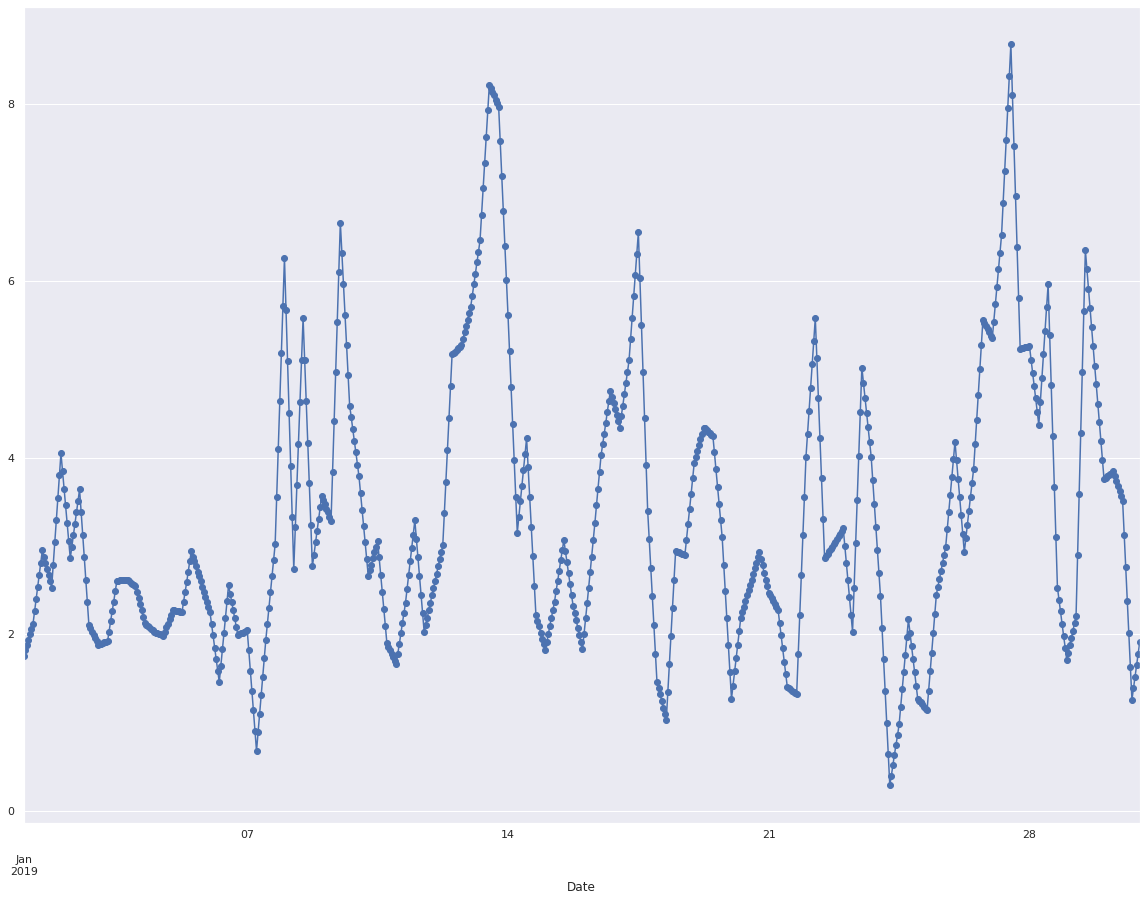

In [ ]:
df_s.loc['2019-01-01':'2019-01-30', 'speed-guitrancourt'].plot(marker='o', linestyle='-')

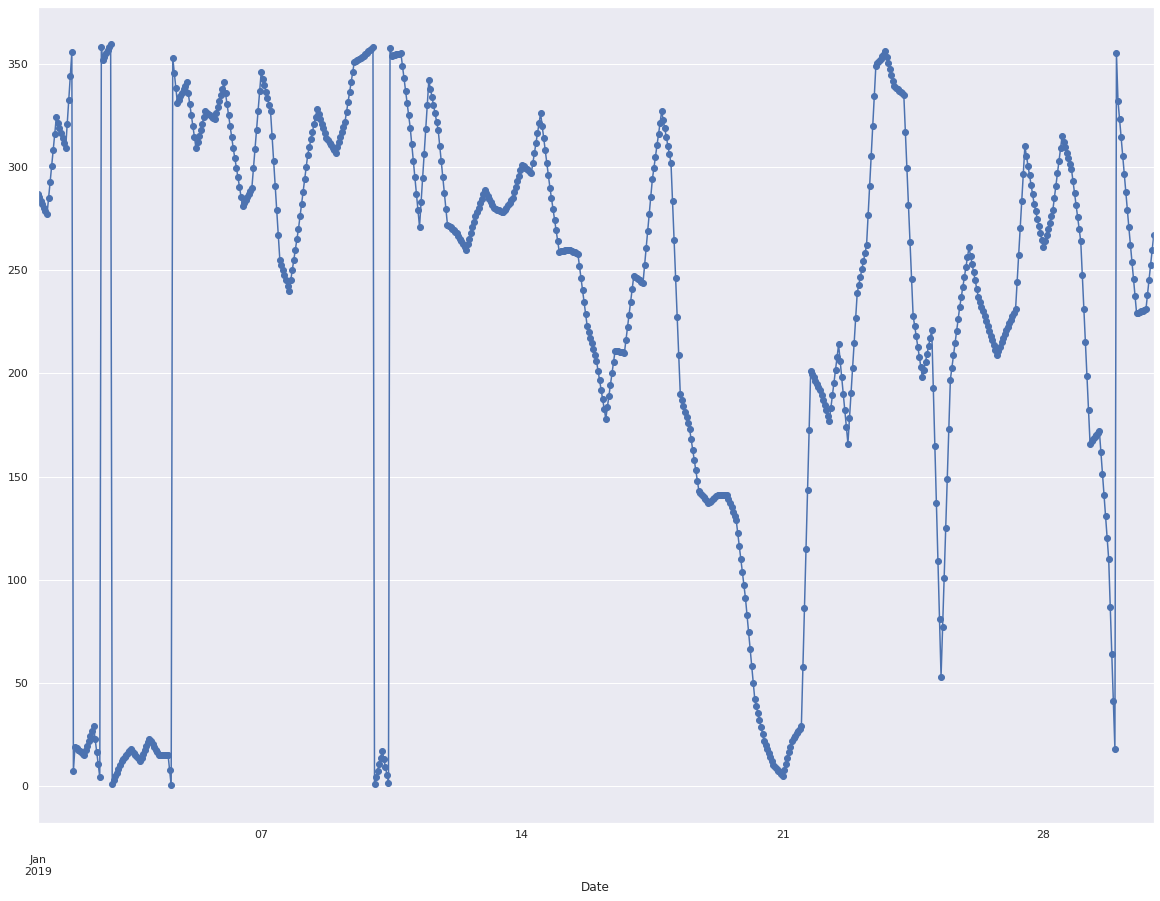

In [ ]:
df_s.loc['2019-01-01':'2019-01-30', 'direction-guitrancourt'].plot(marker='o', linestyle='-')

In [ ]:
df_daily_mean = df_s[cols[1:]].resample('D').mean()
df_weekly_mean = df_s[cols[1:]].resample('W').mean()
df_monthly_mean = df_s[cols[1:]].resample('M').mean()

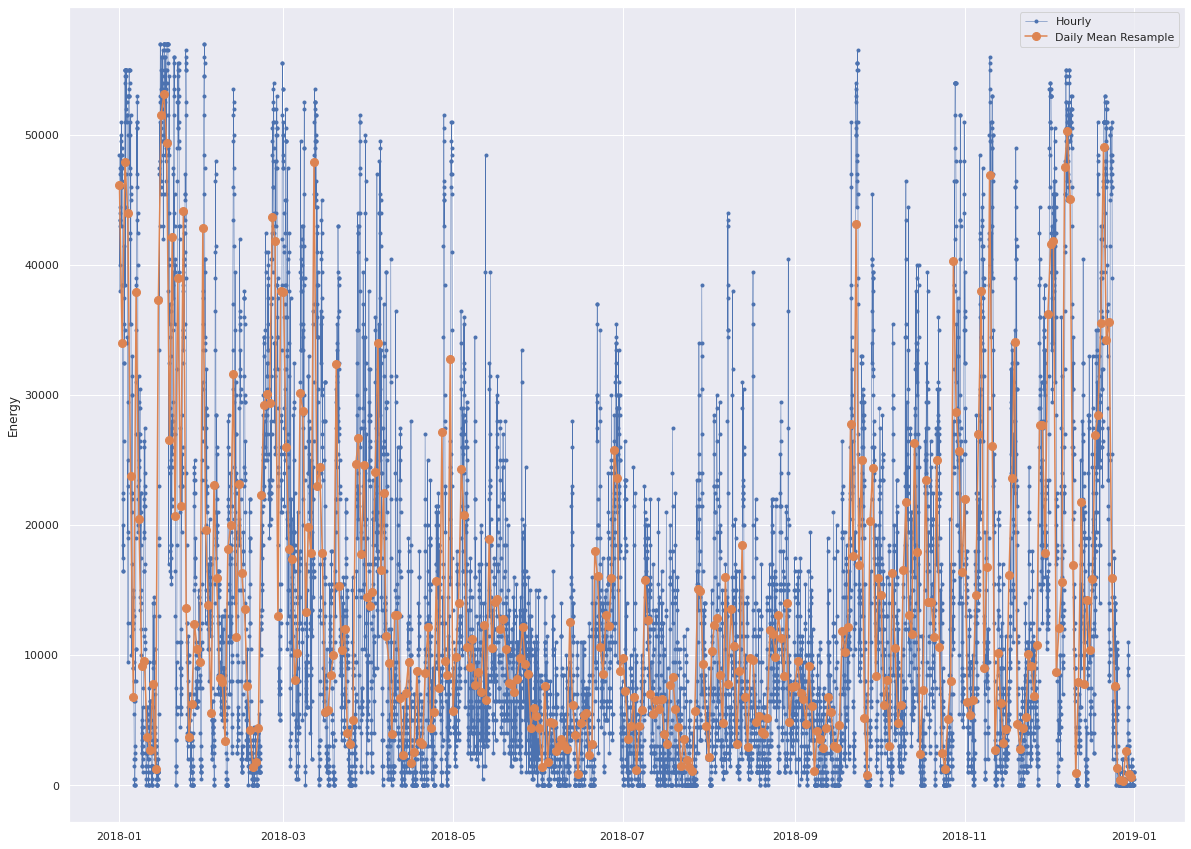

In [ ]:
start, end = '2018-01', '2018-12'

fig, ax = plt.subplots()
ax.plot(df_s.loc[start:end, 'energy'],
marker='.', linestyle='-', linewidth=0.5, label='Hourly')
ax.plot(df_daily_mean.loc[start:end, 'energy'],
marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.set_ylabel('Energy')
ax.legend();

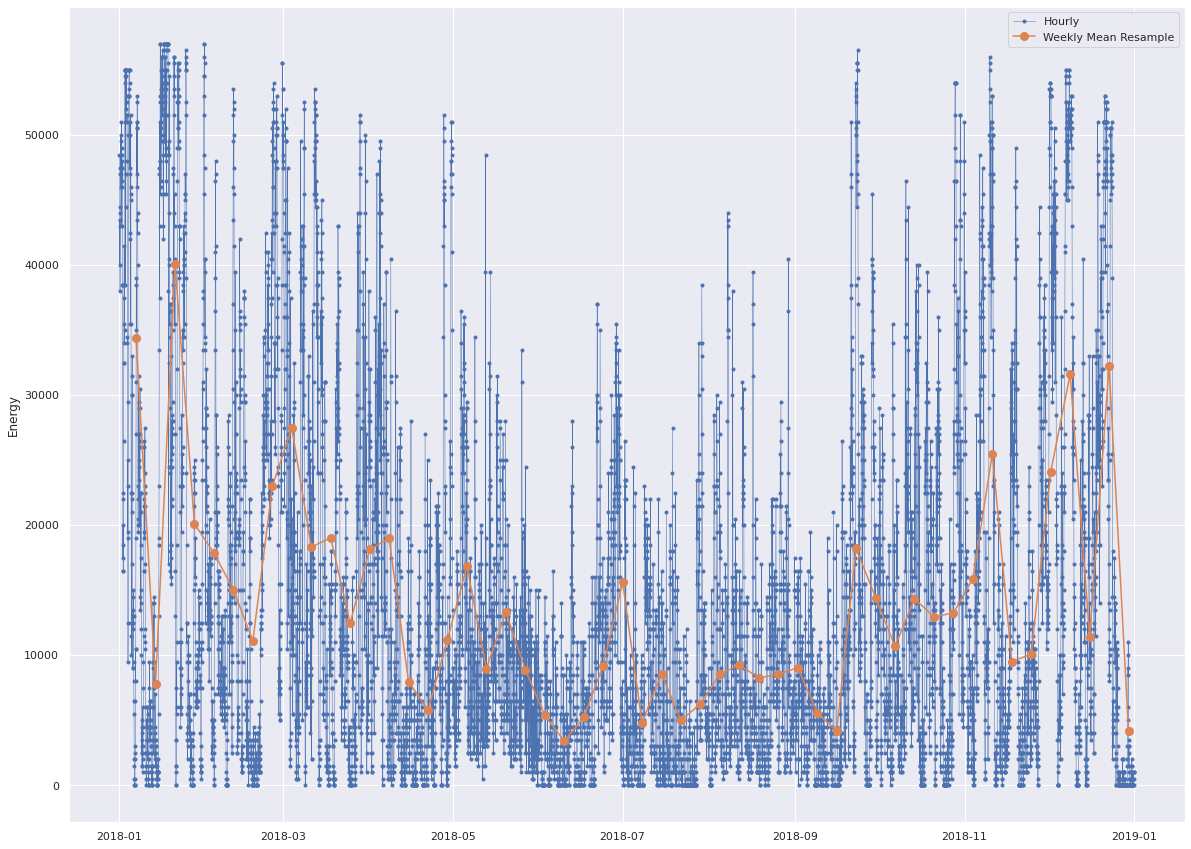

In [ ]:
start, end = '2018-01', '2018-12'

fig, ax = plt.subplots()
ax.plot(df_s.loc[start:end, 'energy'],
marker='.', linestyle='-', linewidth=0.5, label='Hourly')
ax.plot(df_weekly_mean.loc[start:end, 'energy'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Energy')
ax.legend();

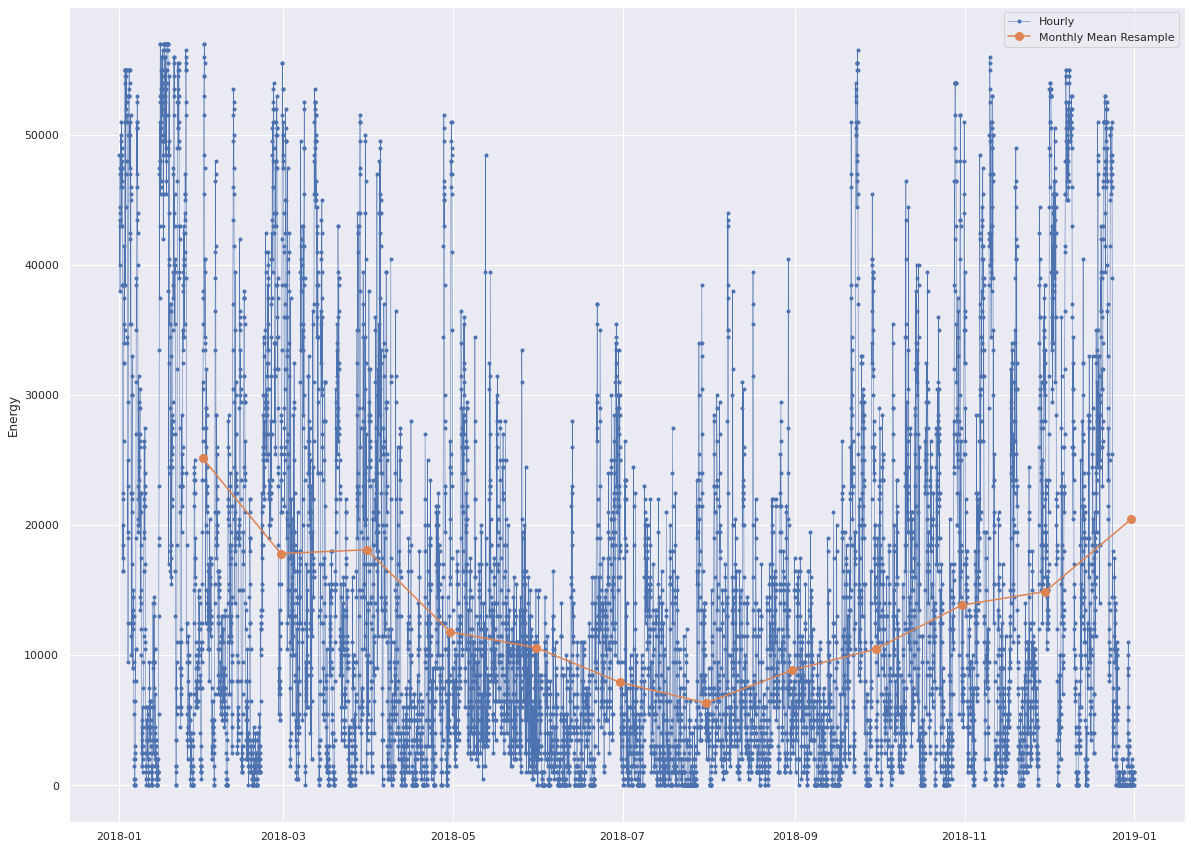

In [ ]:
start, end = '2018-01', '2018-12'

fig, ax = plt.subplots()
ax.plot(df_s.loc[start:end, 'energy'],
marker='.', linestyle='-', linewidth=0.5, label='Hourly')
ax.plot(df_monthly_mean.loc[start:end, 'energy'],
marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Energy')
ax.legend();

In [ ]:
forecast_index = 18
global_index = df_s.index

In [ ]:
## Description takes in 1-dim data, T+, window size
### data - 1 dim time series
### f_idx - T+ value /// leave @ 0 for the moment. may be irrelevant
### window - window - size

def window_list(data, window):
  return(np.vstack([data.shift(i + 1) for i in range(window)][::-1]).T)

In [ ]:
## Returns 1-dim vector of summary stats
## To be used with difference

def win_stat(wnd_list, stat):
  if stat == "mean":
    returned_lst = wnd_list.mean(axis=1)
  elif stat == "median":
    returned_lst = np.median(wnd_list, axis=1)
  elif stat == "std":
    returned_lst = wnd_list.std(axis=1)
  elif stat == "min":
    returned_lst = wnd_list.min(axis=1)
  elif stat == "max":
    returned_lst = wnd_list.max(axis=1)
  elif stat == "range":
    returned_lst = np.ptp(wnd_list, axis=1)
  elif stat == "skew":
    returned_lst = skew(wnd_list, axis=1)
  elif stat == "kurtosis":
    returned_lst = kurtosis(wnd_list, fisher=False, axis=1)
  elif stat == "moment":
    returned_lst = moment(wnd_list, moment=1, axis=1)

  else:
    returned_lst = None
  
  return(returned_lst)

In [ ]:
def difference(data, d):
  return(data.diff(d))

def momentum(data, d):
  return(difference(difference(data, d), d))

def force(data, d):
  return(difference(momentum(data, d), d))

In [ ]:
def difference_comb(data, window, d, cutt=False):

  cut = window - d

  if cut <= 0:
    raise Exception("Window size must be greater than differencing")

  multi_diff = difference(pd.DataFrame(window_list(data, window)), d)
  single_diff = difference(data, d)

  multi_size = multi_diff.shape[1]

  if cutt:
    multi_diff = multi_diff.iloc[:, cut:]

  diffed = np.column_stack((multi_diff, single_diff.rename(multi_size)))

  return(pd.DataFrame(diffed))

def momentum_comb(data, window, d, cutt=False):

  cut = window - d

  if cut <= 0:
    raise Exception("Window size must be greater than differencing")

  multi_diff = momentum(pd.DataFrame(window_list(data, window)), d)
  single_diff = momentum(data, d)

  multi_size = multi_diff.shape[1]

  if cutt:
    multi_diff = multi_diff.iloc[:, cut:]

  diffed = np.column_stack((multi_diff, single_diff.rename(multi_size)))

  return(pd.DataFrame(diffed))

def force_comb(data, window, d, cutt=False):

  cut = window - d

  if cut <= 0:
    raise Exception("Window size must be greater than differencing")

  multi_diff = force(pd.DataFrame(window_list(data, window)), d)
  single_diff = force(data, d)

  multi_size = multi_diff.shape[1]

  if cutt:
    multi_diff = multi_diff.iloc[:, cut:]


  diffed = np.column_stack((multi_diff, single_diff.rename(multi_size)))

  return(pd.DataFrame(diffed))

In [ ]:
### Get number of NaN values to drop
### returns NaNs at start & bottom of last T+ column.

def get_num_nan(df):
  num_nan = df.isnull().sum()
  return([max(num_nan[0:-1]), list(num_nan)[-1]])

In [ ]:
## 2-d Matrix to Pandas Dataframe
## adds global index as DF index
## adds convenience for combination later

def build_data(data, index):
  data_df = pd.DataFrame(data)
  data_df["Date"] = index
  data_df = data_df.set_index("Date")
  return(data_df)

In [ ]:
## Re-Centers data after multiple shifts
## uses num_nan output
def cut_final(df):
  h, t = get_num_nan(df)

  return(final[h:][:-t])

In [ ]:
'''
0 - 24 window
0 - 24 mean
0 - 24 difference
0 - 24 difference mean
0 - 24 difference difference mean
0 - 24 5 difference mean
0 - 24 momentum
'''

In [ ]:
temp = window_list(df_s.energy, 7)



temp_df = pd.DataFrame(temp)
temp_df["Date"] = global_index
temp_df = temp_df.set_index("Date")


window_list(df_s.energy, 7)

In [ ]:
tempo = difference_comb(df_s.energy, 0, 7, 1)

tempo_df = pd.DataFrame(tempo)
tempo_df["Date"] = global_index
tempo_df = tempo_df.set_index("Date")


difference_comb(df_s.energy, 0, 7, 1)

In [ ]:
tempo_mean = win_stat(tempo, "std")


tempomean_df = pd.DataFrame(tempo_mean)
tempomean_df["Date"] = global_index
tempomean_df = tempomean_df.set_index("Date")

win_stat(tempo, "std")

In [ ]:
final = concat([tempomean_df, tempo_df, temp_df, df_s.energy, df_s.energy.shift(-4)], axis=1)

In [ ]:
df_temp = df_s.energy[100:120]

In [ ]:
AWS lambda serverless everyhour

dockerize model

